In [2]:
import pandas as pd
import glob
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

(15588, 5)
8815
(6773, 5)
       filename       |accuracy | f1
['2024-04-16_08-46.csv', 0.622, 0.57]


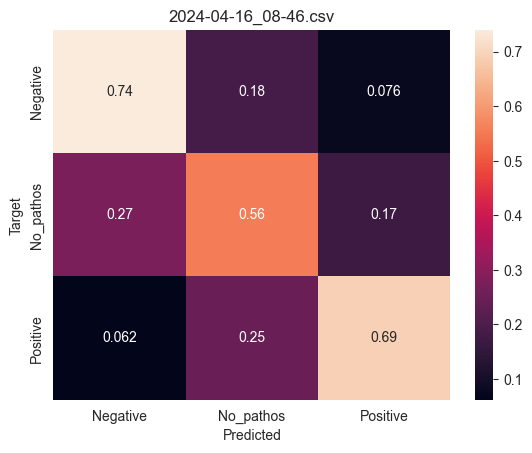

In [31]:
def val_metrics(predicted, val_labels, target_map, filename):
    acc_sc = round(accuracy_score(val_labels, predicted), 3)
    f1_sc = round(f1_score(val_labels, predicted, average='macro'), 3)

    cm = confusion_matrix(val_labels, predicted, normalize='true')
    plot_cm(cm, target_map, filename)
    
    return acc_sc, f1_sc

def plot_cm(cm, target_map, filename):
    plt.figure()
    classes = list(target_map.values())
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='.2g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    ax.set_title(filename)
    
def find_labels_in_text(text):
    temp = []
    if type(text)==str:
        text = text.lower()
        if 'positive pathos' in text:
            temp.append('Positive')
        if 'negative pathos' in text:
            temp.append('Negative')
        if 'no pathos' in text:
            temp.append('No_pathos')
        if 'unclear' in text:
            temp.append('Unclear')
    
        if len(temp)==1:
            return temp[0]
        else:
            return 'Unclear'
    else:
        return 'Unclear'


reversed_tg = {0: 'Negative', 1: 'No_pathos',2 : 'Positive'}


def validate_prompt_responses(path, reversed_tg, filename):
    df = pd.read_csv(path, sep='|', header=0)
    df['label_found'] = df['response'].apply(find_labels_in_text)
    # print(df['label'].dtype)
    # df['label'] = df['label'].map(reversed_tg)
    print(df.shape)
    print(df[df['label_found']=='Unclear'].count()['label'])
    df = df[df['label_found']!='Unclear']
    print(df.shape)

    acc_sc, f1_sc = val_metrics(df['label_found'], df['label'], reversed_tg, filename)
    
    return acc_sc, f1_sc

paths = glob.glob('output/prompting/responses/*')[-1:]
scores = []
for path in paths:
    filename = path.rsplit('\\')[-1]
    acc_sc, f1_sc = validate_prompt_responses(path, reversed_tg, filename)
    scores.append([filename, acc_sc, f1_sc])

print(f'       filename       |accuracy | f1')
print(*scores, sep='\n')